<a href="https://colab.research.google.com/github/Tiagoalvesds/tesouro_direto/blob/main/tesourov2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [1]:
#!pip install pygwalker -q
#import pygwalker as pyg

In [2]:
%pip install pandas
%pip install numpy
import pandas as pd
import numpy as np
%pip install seaborn
import seaborn as sb
%pip install matplotlib
import matplotlib.pyplot as plot


# API -Tesouro Transparente

In [3]:
url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'

# Organizando o Dataframe

In [4]:
df = pd.read_csv(url, sep =';')
df.tail()

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
134857,Tesouro IPCA+ com Juros Semestrais,15/05/2015,15/08/2008,"7,90","7,96","1623,44","1618,49","1617,39"
134858,Tesouro IPCA+ com Juros Semestrais,15/05/2045,15/08/2008,"6,98","7,08","1570,53","1550,41","1549,40"
134859,Tesouro IPCA+ com Juros Semestrais,15/05/2035,15/08/2008,"7,05","7,15","1576,87","1558,38","1557,37"
134860,Tesouro IPCA+ com Juros Semestrais,15/08/2024,15/08/2008,"7,17","7,25","1576,94","1565,02","1564,00"
134861,Tesouro IPCA+ com Juros Semestrais,15/05/2017,15/08/2008,"7,70","7,76","1608,80","1602,80","1601,73"


# Funções de Busca

In [5]:
def busca_titulos_tesouro_direto():
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
  df['Data Base']       = pd.to_datetime(df['Data Base'], dayfirst=True)

  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]
  return df

In [6]:
titulos = busca_titulos_tesouro_direto()
titulos

Taxa Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                       
Tesouro Selic                      2014-03-07      2008-06-16              -0.03   
                                   2009-03-18      2008-06-16              -0.07   
                                   2010-03-17      2008-06-16              -0.05   
                                   2011-03-16      2008-06-16              -0.04   
                                   2012-03-07      2008-06-16              -0.03   
...                                                                          ...   
Tesouro IPCA+ com Juros Semestrais 2015-05-15      2008-08-15               7.90   
                                   2045-05-15      2008-08-15               6.98   
                                   2035-05-15      2008-08-15               7.05   
                                   2024-08-15      2008-08-15               7.17   
                                   2017-05-15      2008-08-15               7.70   

                                                               Taxa Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                      
Tesouro Selic                      2014-03-07      2008-06-16              0.01   
                                   2009-03-18      2008-06-16             -0.06   
                                   2010-03-17      2008-06-16             -0.03   
                                   2011-03-16      2008-06-16             -0.01   
                                   2012-03-07      2008-06-16              0.01   
...                                                                         ...   
Tesouro IPCA+ com Juros Semestrais 2015-05-15      2008-08-15              7.96   
                                   2045-05-15      2008-08-15              7.08   
                                   2035-05-15      2008-08-15              7.15   
                                   2024-08-15      2008-08-15              7.25   
                                   2017-05-15      2008-08-15              7.76   

                                                               PU Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                     
Tesouro Selic                      2014-03-07      2008-06-16          3484.94   
                                   2009-03-18      2008-06-16          3480.82   
                                   2010-03-17      2008-06-16          3482.01   
                                   2011-03-16      2008-06-16          3482.79   
                                   2012-03-07      2008-06-16          3482.85   
...                                                                        ...   
Tesouro IPCA+ com Juros Semestrais 2015-05-15      2008-08-15          1623.44   
                                   2045-05-15      2008-08-15          1570.53   
                                   2035-05-15      2008-08-15          1576.87   
                                   2024-08-15      2008-08-15          1576.94   
                                   2017-05-15      2008-08-15          1608.80   

                                                               PU Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                    
Tesouro Selic                      2014-03-07      2008-06-16         3476.98   
                                   2009-03-18      2008-06-16         3480.56   
                                   2010-03-17      2008-06-16         3480.79   
                                   2011-03-16      2008-06-16         3479.92   
                                   2012-03-07      2008-06-16         3477.67   
...                                                                       ...   
Tesouro IPCA+ com Juros Semestrais 2015-05-15      2008-08-15         1618.49   
                                   2045-05-15      2008-08-15         1550.41   
             

# Análise Exploratória do Dataframe

In [7]:
#Tamanho do corpo(linhas e colunas)
df.shape

(134862, 8)

In [8]:
#Verificando valores faltantes
df.isnull().sum()

Tipo Titulo          0
Data Vencimento      0
Data Base            0
Taxa Compra Manha    0
Taxa Venda Manha     0
PU Compra Manha      0
PU Venda Manha       0
PU Base Manha        0
dtype: int64

In [9]:
# 1° Verificando Títulos únicos
titulo = df['Tipo Titulo'].unique()
titulo

array(['Tesouro Selic', 'Tesouro Prefixado',
       'Tesouro IPCA+ com Juros Semestrais', 'Tesouro IPCA+',
       'Tesouro IGPM+ com Juros Semestrais',
       'Tesouro Prefixado com Juros Semestrais',
       'Tesouro Renda+ Aposentadoria Extra', 'Tesouro Educa+'],
      dtype=object)

In [10]:
# 2° Verificando Data base únicos
data_base = df['Data Base'].unique()
data_base

array(['16/06/2008', '13/06/2008', '12/06/2008', ..., '15/10/2008',
       '19/08/2008', '18/08/2008'], dtype=object)

In [11]:
df.head(10)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
0,Tesouro Selic,07/03/2014,16/06/2008,"-0,03","0,01","3484,94","3476,98","3475,38"
1,Tesouro Selic,18/03/2009,16/06/2008,"-0,07","-0,06","3480,82","3480,56","3478,97"
2,Tesouro Selic,17/03/2010,16/06/2008,"-0,05","-0,03","3482,01","3480,79","3479,20"
3,Tesouro Selic,16/03/2011,16/06/2008,"-0,04","-0,01","3482,79","3479,92","3478,33"
4,Tesouro Selic,07/03/2012,16/06/2008,"-0,03","0,01","3482,85","3477,67","3476,08"
5,Tesouro Prefixado,01/07/2010,16/06/2008,"15,02","15,08","751,69","750,89","750,47"
6,Tesouro Prefixado,01/01/2010,16/06/2008,"14,89","14,94","806,24","805,70","805,25"
7,Tesouro Prefixado,01/10/2009,16/06/2008,"14,71","14,75","836,41","836,03","835,58"
8,Tesouro Prefixado,01/07/2009,16/06/2008,"14,35","14,39","869,40","869,08","868,62"
9,Tesouro Prefixado,01/07/2008,16/06/2008,"12,16","12,19","995,45","995,44","994,99"


In [12]:
# 3° Verificando Vencimentos únicos
data_vencimento=df['Data Vencimento'].unique()
data_vencimento

array(['07/03/2014', '18/03/2009', '17/03/2010', '16/03/2011',
       '07/03/2012', '01/07/2010', '01/01/2010', '01/10/2009',
       '01/07/2009', '01/07/2008', '01/10/2008', '01/04/2009',
       '01/01/2009', '15/05/2045', '15/05/2035', '15/08/2024',
       '15/05/2017', '15/05/2015', '15/08/2012', '15/05/2011',
       '15/08/2010', '15/05/2009', '15/08/2008', '15/05/2013',
       '01/01/2031', '01/04/2021', '01/07/2017', '01/03/2011',
       '01/01/2017', '01/01/2014', '01/01/2013', '01/01/2012',
       '01/01/2011', '07/03/2013', '18/06/2008', '01/01/2008',
       '17/01/2007', '01/01/2007', '01/10/2006', '01/07/2006',
       '01/07/2007', '01/10/2007', '01/04/2007', '15/05/2007',
       '15/08/2006', '01/04/2008', '01/12/2006', '01/01/2006',
       '01/12/2005', '18/01/2006', '01/04/2006', '01/10/2005',
       '08/03/2013', '01/07/2005', '01/04/2005', '16/02/2005',
       '04/01/2005', '15/12/2079', '15/12/2059', '15/12/2049',
       '15/12/2069', '15/12/2064', '15/12/2054', '15/12

In [13]:
# 4º Selecionando ativo e vencimento

select_tesouro = titulos.loc [('Tesouro Prefixado', '01-01-2025')]
select_tesouro.head()

<ipython-input-13-85948beb5db7>:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  select_tesouro = titulos.loc [('Tesouro Prefixado', '01-01-2025')]


,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2023-08-21,10.49,10.61,873.03,871.39,871.39
2023-08-18,10.49,10.61,872.69,871.05,871.05
2023-08-01,10.61,10.73,866.87,865.19,865.19
2023-07-31,10.55,10.67,867.19,865.51,865.51
2023-05-23,11.76,11.88,835.99,834.18,834.18


In [32]:
#Selecionando a Melhor Compra
tx_compra = select_tesouro.loc[:,'Taxa Compra Manha']
tx_compra

Data Base
2023-08-21    10.49
2023-08-18    10.49
2023-08-01    10.61
2023-07-31    10.55
2023-05-23    11.76
              ...  
2018-03-16     9.45
2018-03-15     9.52
2018-03-14     9.47
2018-03-13     9.56
2018-03-12     9.54
Name: Taxa Compra Manha, Length: 1415, dtype: float64

<Axes: xlabel='Data Base'>

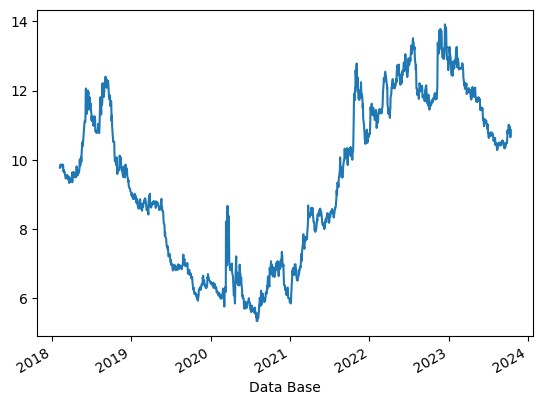

In [15]:
select_tesouro ['Taxa Compra Manha'].plot()

In [16]:
# Péssima Taxa de Compra (preta)
Q0 = np.percentile(tx_compra,[0])
Q0

array([5.34])

In [17]:
# Ruim Taxa de Compra (vermelha)
Q1 = np.percentile(tx_compra,[25])
Q1

array([6.96])

In [18]:
# Média Taxa de Compra (laranja)
Q2 = np.percentile(tx_compra,[50])
Q2

array([9.6])

In [19]:
# 2º Melhor Taxa de Compra(amarela)
Q3 = np.percentile(tx_compra,[75])
Q3

array([11.625])

In [20]:
# 1° Melhor Taxa de Compra(verde)
Q4 = np.percentile(tx_compra,[100])
Q4

array([13.91])

In [21]:
tx_compra. describe()

count    1415.000000
mean        9.437541
std         2.346564
min         5.340000
25%         6.960000
50%         9.600000
75%        11.625000
max        13.910000
Name: Taxa Compra Manha, dtype: float64

TESTES FINAIS

In [22]:
import plotly.graph_objects as go


In [43]:
x_data = tx_compra    # Dados para o eixo x
y1_data = [Q1]        # Dados para a primeira linha
y2_data = [Q2]        # Dados para a segunda linha
y3_data = [Q3]        # Dados para a segunda linha



In [39]:
fig = go.Figure()

# Adicione as linhas ao gráfico
fig.add_trace(go.Scatter(x=x_data, y=y1_data, mode='lines', name='Q 1'))
fig.add_trace(go.Scatter(x=x_data, y=y2_data, mode='lines', name='Q 2'))
fig.add_trace(go.Scatter(x=x_data, y=y3_data, mode='lines', name='Q 3'))

# Atualize o layout do gráfico conforme necessário
fig.update_layout(title='Evolução do Título', xaxis_title='Taxa de Compra', yaxis_title='Quartil')

# Exiba o gráfico
fig.show()


<Axes: xlabel='Data Base'>

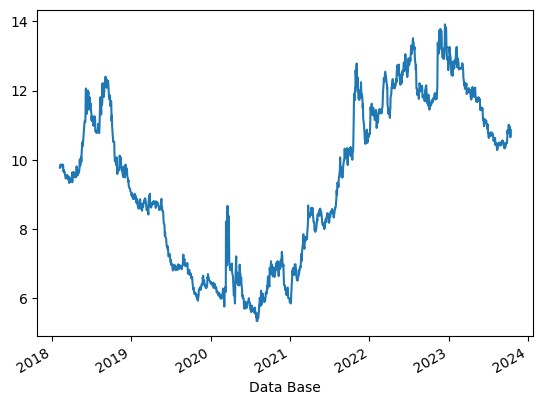

In [25]:
#TESTE DE INCLUIR LINHAS DOS QUADRANTES
select_tesouro ['Taxa Compra Manha'].plot(y=Q1,)

In [26]:
pyg.walk(df)

NameError: ignored